In [1]:
import rsatoolbox
from rsatoolbox.rdm import calc_rdm, calc_rdm_movie
import numpy as np
import matplotlib.pyplot as plt 

In [20]:
SCA = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_26_6_2024/kernel/3d_neural/projection_3d_l0.0_linear.npy")#[:10]
kSCA = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_26_6_2024/kernel/3d_neural/projection_3d_l1.0_gaussian.npy")#[:10]
neural_data = np.load(f'/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/X_softNormMax_centerFalse.npy')
PCA = np.load("/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_26_6_2024/kernel/X_pca_3d.npy")

SCA_candidates = [PCA, SCA, kSCA, neural_data]
model_names = ['PCA','SCA', 'kSCA', 'Neural data']
#aug_behaviour = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_26_6_2024/kernel/3d_aug_behaviour/projection_3d_l0.0_linear.npy")#[:10]
aug_behaviour =  np.load('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/behaviour/aug_behaviour.npy')


In [21]:
method = 'correlation'

times = np.arange(-250, 450, 20).tolist()   
tim_des = {'time': times}
behaviour_K = rsatoolbox.data.TemporalDataset(aug_behaviour,time_descriptors = tim_des)
behaviour_KT = behaviour_K.convert_to_dataset('time')
rdms_behaviour_K = calc_rdm_movie(behaviour_K, method = method)
rdms_behaviour_KT = calc_rdm(behaviour_KT, method = method)
print(rdms_behaviour_K.get_matrices().shape)

models = []
rdms_neural_K = []
rdms_neural_KT = []
for i in range(len(SCA_candidates)):
    data_K = rsatoolbox.data.TemporalDataset(SCA_candidates[i],time_descriptors = tim_des)
    data_KT = data_K.convert_to_dataset('time')
    rdms_data_K = calc_rdm_movie(data_K, method = method)
    rdms_neural_K.append(rdms_data_K)

    rdms_data_KT = calc_rdm(data_KT, method = method)
    rdms_neural_KT.append(rdms_data_KT)

    m = rsatoolbox.model.ModelFixed(model_names[i], rdms_data_K)
    models.append(m)



(35, 108, 108)


In [22]:
print( np.corrcoef(rdms_behaviour_KT.get_vectors(), rdms_neural_KT[0].get_vectors())[0,1] )

print( np.corrcoef(rdms_behaviour_KT.get_vectors(), rdms_neural_KT[1].get_vectors())[0,1] )

print( np.corrcoef(rdms_behaviour_KT.get_vectors(), rdms_neural_KT[2].get_vectors())[0,1] )

print( np.corrcoef(rdms_behaviour_KT.get_vectors(), rdms_neural_KT[3].get_vectors())[0,1] )

0.5276046209610514
0.29734852016341107
0.15931759825933045
0.32065329522348346


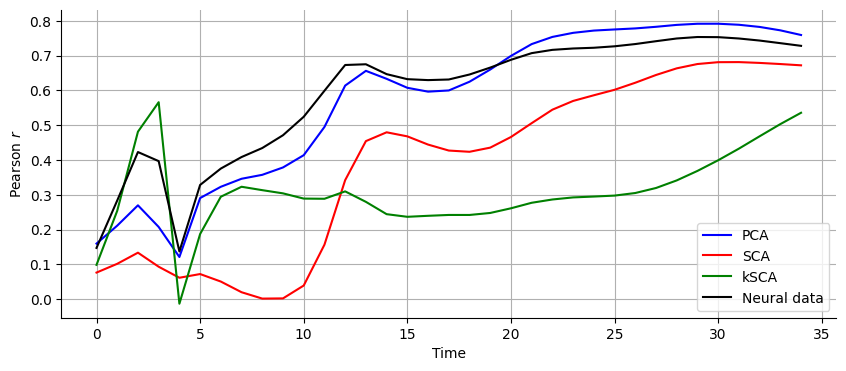

In [23]:
ls_r_pca = []
ls_r_sca = []
ls_r_ksca = []
ls_r_neural = []
for i in range(rdms_behaviour_K.get_vectors().shape[0]):
    ls_r_pca.append( np.corrcoef(rdms_behaviour_K.get_vectors()[i], rdms_neural_K[0].get_vectors()[i])[0,1] )
    ls_r_sca.append( np.corrcoef(rdms_behaviour_K.get_vectors()[i], rdms_neural_K[1].get_vectors()[i])[0,1] )
    ls_r_ksca.append( np.corrcoef(rdms_behaviour_K.get_vectors()[i], rdms_neural_K[2].get_vectors()[i])[0,1] )
    ls_r_neural.append( np.corrcoef(rdms_behaviour_K.get_vectors()[i], rdms_neural_K[3].get_vectors()[i])[0,1] )
    

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(ls_r_pca, label='PCA', color='b')
ax.plot(ls_r_sca, label='SCA', color='r')
ax.plot(ls_r_ksca, label='kSCA', color='g')
ax.plot(ls_r_neural, label='Neural data', color='black')
ax.set_ylabel(r'Pearson $r$')
ax.set_xlabel('Time')
ax.legend()
ax.spines[['top','right']].set_visible(False)
plt.grid()
plt.show()

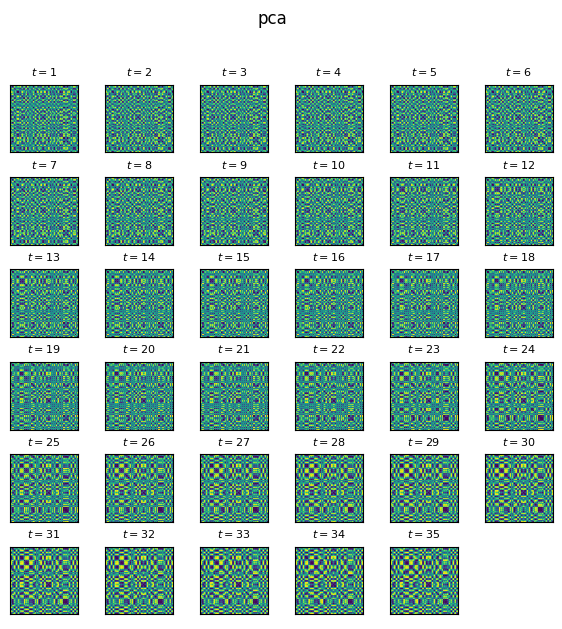

In [18]:
rdm_behaviour = rdms_behaviour_K.get_matrices() 
rdm_neural_pca = rdms_neural_K[0].get_matrices() 
rdm_neural_sca = rdms_neural_K[1].get_matrices() 
rdm_neural_ksca = rdms_neural_K[2].get_matrices() 
rdm_neural_neural = rdms_neural_K[3].get_matrices() 

def get_RDM_movie(rdms, title):
    fig, axs = plt.subplots(6,6,figsize=(7,7))
    axs = axs.flatten()
    for i in range(rdms.shape[0]):
        axs[i].imshow(rdms[i])
        axs[i].set_xticks([]) 
        axs[i].set_yticks([])
        axs[i].set_title(r'$t={}$'.format(i+1), fontsize=8)

    if len(axs) > len(rdms):
        axs[len(rdms)].axis('off')
    
    plt.suptitle(title)
    plt.subplots_adjust(wspace=0.4, hspace=0.2)
    plt.show()

get_RDM_movie(rdm_neural_pca, 'pca')


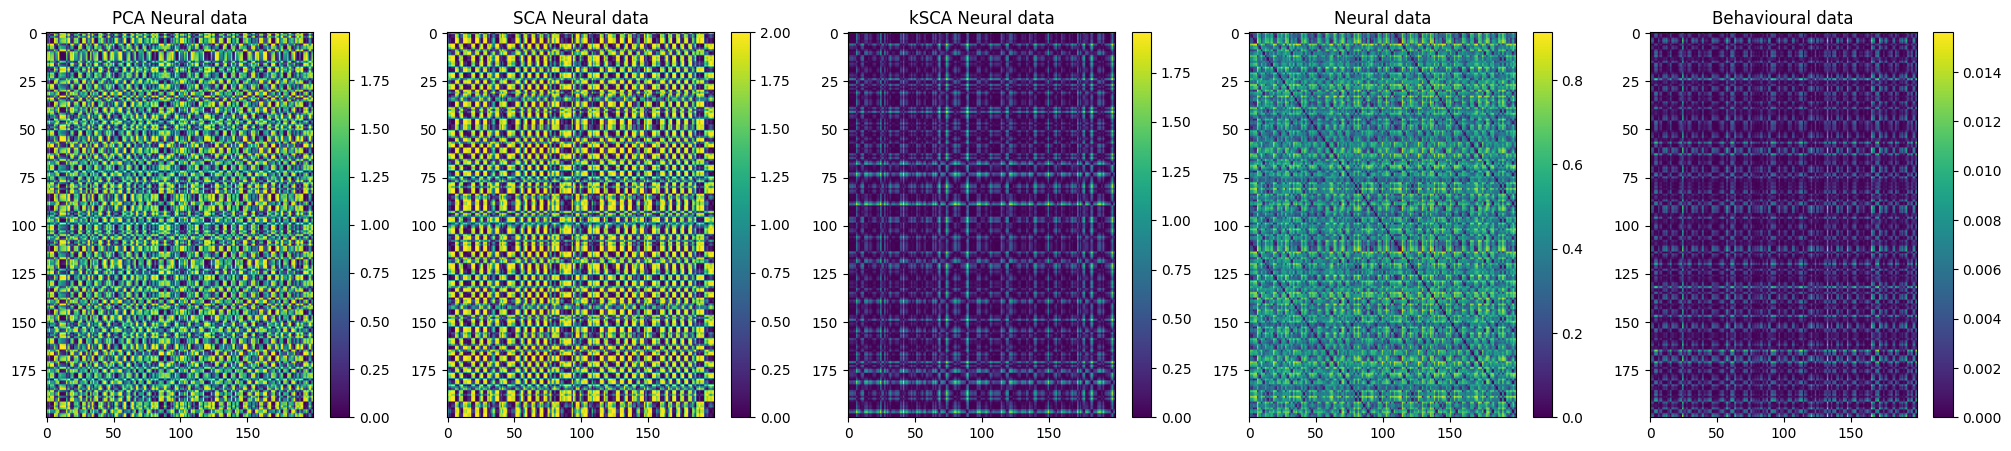

In [19]:
fig, ax = plt.subplots(1, 5, figsize=(25, 5))

titles = ['PCA Neural data','SCA Neural data', 'kSCA Neural data', 'Neural data', 'Behavioural data']

ind = 200
data_sources = [
    rdms_neural_KT[0].get_matrices().squeeze()[:ind, :ind],
    rdms_neural_KT[1].get_matrices().squeeze()[:ind, :ind],
    rdms_neural_KT[2].get_matrices().squeeze()[:ind, :ind],
    rdms_neural_KT[3].get_matrices().squeeze()[:ind, :ind],
    rdms_behaviour_KT.get_matrices().squeeze()[:ind, :ind]
]

for i, (axi, data) in enumerate(zip(ax, data_sources)):
    im = axi.imshow(data, aspect='auto')
    axi.set_title(titles[i])
    fig.colorbar(im, ax=axi)  # Add colorbar for each axes

plt.show()

ENDS HERE 

In [ ]:

data = rsatoolbox.data.Dataset(np.random.rand(10, 5))
rdms = rsatoolbox.rdm.calc_rdm(data)
rsatoolbox.vis.show_rdm(rdms)

plt.figure(figsize=(3,3))
cmap = plt.get_cmap('gray_r')
plt.imshow( rdms.get_matrices().squeeze() , cmap=cmap) 
plt.colorbar()
plt.show()

In [ ]:
neural_K = rsatoolbox.data.TemporalDataset(kSCA,time_descriptors = tim_des)
neural_KT = neural_K.convert_to_dataset('time')
rdms_neural_KT = calc_rdm(neural_KT, method = 'euclidean')
model = rsatoolbox.model.ModelFixed('test', rdms_neural_KT)

np.corrcoef(rdms_behaviour_KT.get_vectors(), rdms_neural_KT.get_vectors())

In [ ]:
side = ['l', 'l', 'l', 'r', 'r', 'r']
stimulus = [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
data = rsatoolbox.data.Dataset(
    np.random.rand(10, 6),
    channel_descriptors={'side': side},
    obs_descriptors={'stimulus': stimulus})

rdms = rsatoolbox.rdm.calc_rdm(data)
model = rsatoolbox.model.ModelFixed('test', rdms)

plt.imshow(rdms.get_matrices().squeeze())
rdms.get_matrices().squeeze()

In [ ]:
results_1 = rsatoolbox.inference.eval_fixed(models, rdms_behaviour_K, method='corr')
print(results_1)